<a href="https://colab.research.google.com/github/Emily-Hsu2004/edu-data-mining-/blob/main/%E7%B7%B4%E7%BF%92/week3-%E8%AA%B2%E5%A0%82%E7%B7%B4%E7%BF%921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課堂作業1
力宇平台資料-力宇教育-時數報表113.08.01-113.12.31
https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing

## 檔案下載

### 獲得google 權限

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

### 加載到colab

In [ ]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
lu_gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xvejsHOwB55WaoastSA5uQ2BAK2IChWKQSNmFf5Tb6I/edit?usp=sharing')

In [ ]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
lu_sheets = lu_gsheets.worksheet('金寧國中').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df_0 = pd.DataFrame(lu_sheets[1:], columns=lu_sheets[0])
# 取得最前面的5筆資料
df_0.head()

,學校名稱,年級,帳號,座號,學生姓名,班級,科目,指派測驗平均成績,老師指派測驗數,老師指派測驗完成數,老師指派測驗題目數,自我練習平均成績,自我測驗卷數,自我練習題目數,完成老師指派影片數,自我點播影片數,累積影片總時數
0,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-自然(113建立),自然,0,0,0,0,0,0,0,0,0,00:00:00
1,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-國文(113建立),國語文,0,0,0,55,0,0,0,0,0,00:00:00
2,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-社會(113建立),社會,0,0,0,0,0,0,0,0,0,00:00:00
3,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-英語文(113建立),英語文,0,0,0,0,0,0,0,0,0,00:00:00
4,金門縣立金寧國民中(小)學,7,714503-student-364,1,李孟哲,七年一班-數學(113建立),數學,70,1,1,20,70,0,0,0,0,00:00:00


## 初步檢查

In [ ]:
type(df_0['指派測驗平均成績'][0])

numpy.int64

### 轉成數字格式

In [ ]:
columns_to_convert = [
    '指派測驗平均成績', '老師指派測驗完成數', '老師指派測驗題目數',
    '自我練習平均成績', '自我測驗卷數', '自我練習題目數',
    '完成老師指派影片數', '自我點播影片數'
]

for col in columns_to_convert:
    df_0[col] = pd.to_numeric(df_0[col], errors='coerce').fillna(0).astype(int)


## 作圖

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-03-05 07:48:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-03-05 07:48:45--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   117MB/s    in 0.2s    

2025-03-05 07:48:48 (117 MB/s)

<ipython-input-48-22eaefe5f318>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


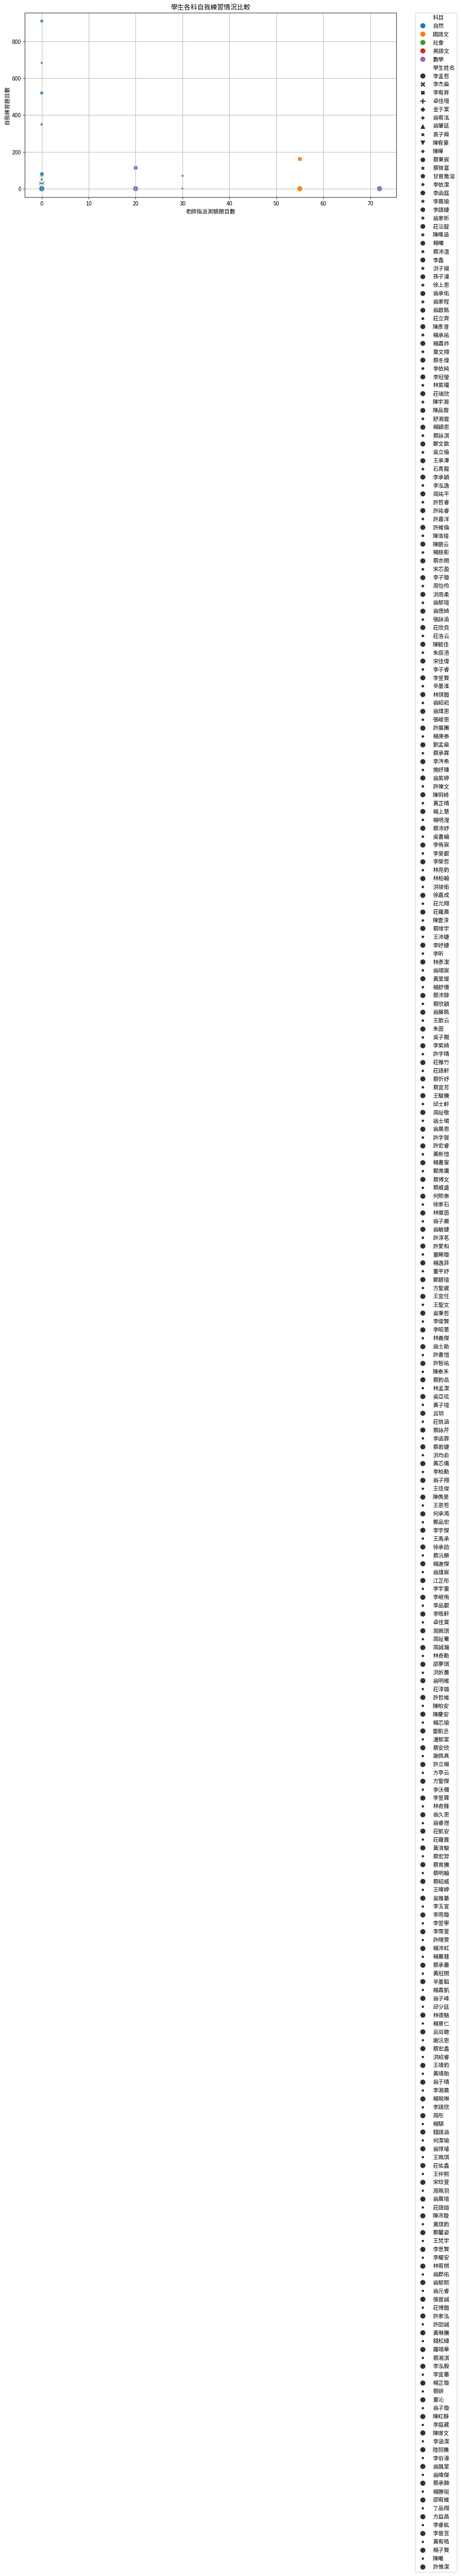

<ipython-input-48-22eaefe5f318>:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-48-22eaefe5f318>:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


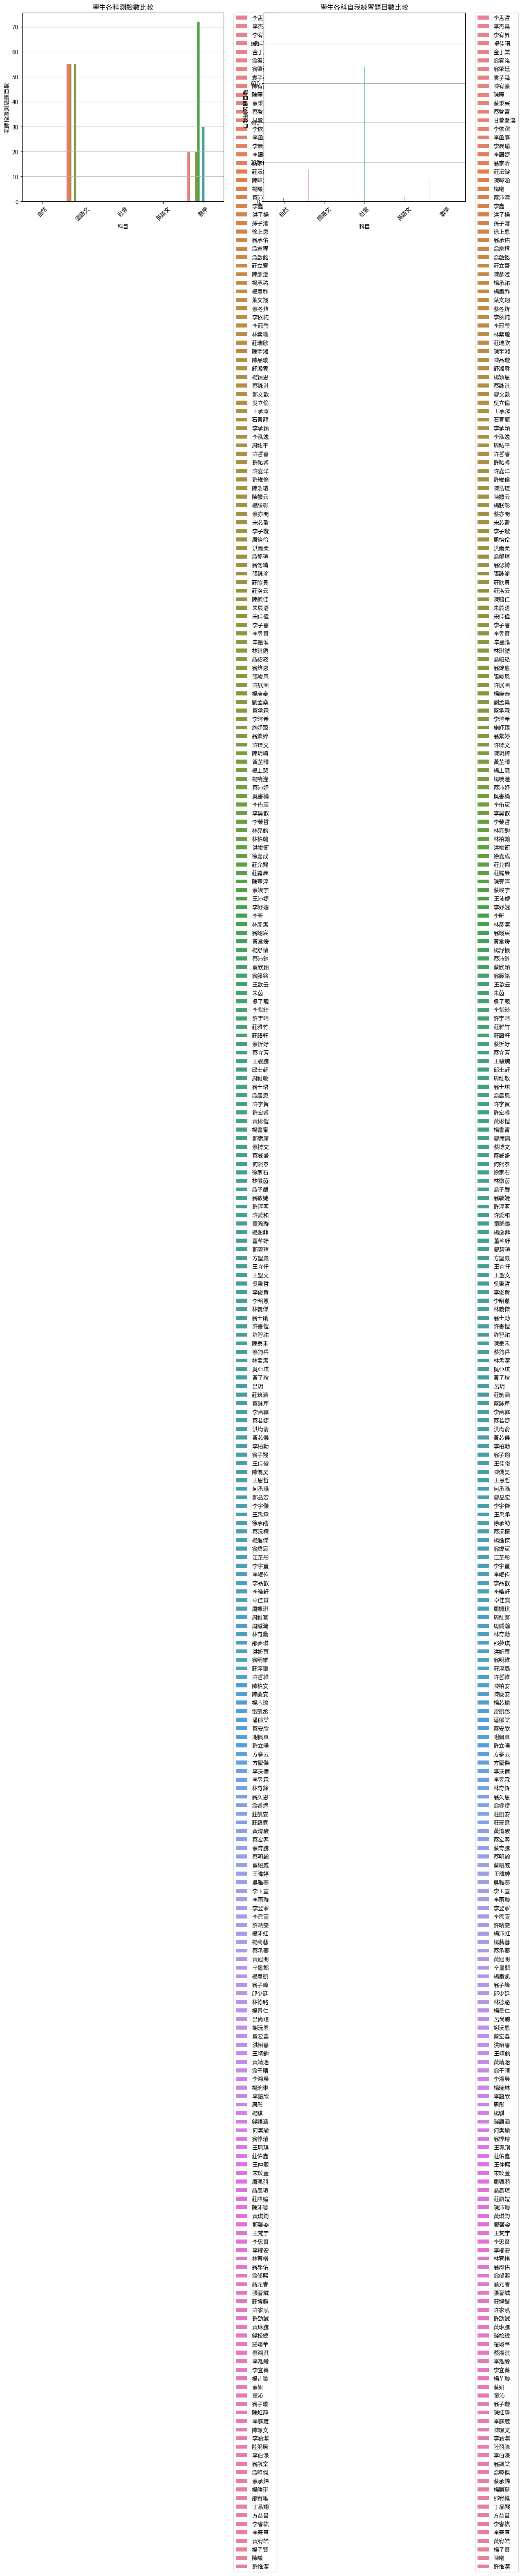

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取
df_ss = df_0

# 繪製散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_ss,
    x="老師指派測驗題目數",
    y="自我練習題目數",
    hue="科目",
    style="學生姓名",
    s=100,
)
plt.title("學生各科自我練習情況比較")
plt.xlabel("老師指派測驗題目數")
plt.ylabel("自我練習題目數")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(True)
plt.tight_layout()
plt.show()

# 繪製長條圖
plt.figure(figsize=(14, 6))

# 自我測驗卷數長條圖
plt.subplot(1, 2, 1)
sns.barplot(data=df_ss, x="科目", y="老師指派測驗題目數", hue="學生姓名")
plt.title("學生各科測驗數比較")
plt.xlabel("科目")
plt.ylabel("老師指派測驗題目數")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(axis="y")
plt.tight_layout()

# 自我練習題目數長條圖
plt.subplot(1, 2, 2)
sns.barplot(data=df_ss, x="科目", y="自我練習題目數", hue="學生姓名")
plt.title("學生各科自我練習題目數比較")
plt.xlabel("科目")
plt.ylabel("自我練習題目數")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.grid(axis="y")
plt.tight_layout()

plt.show()

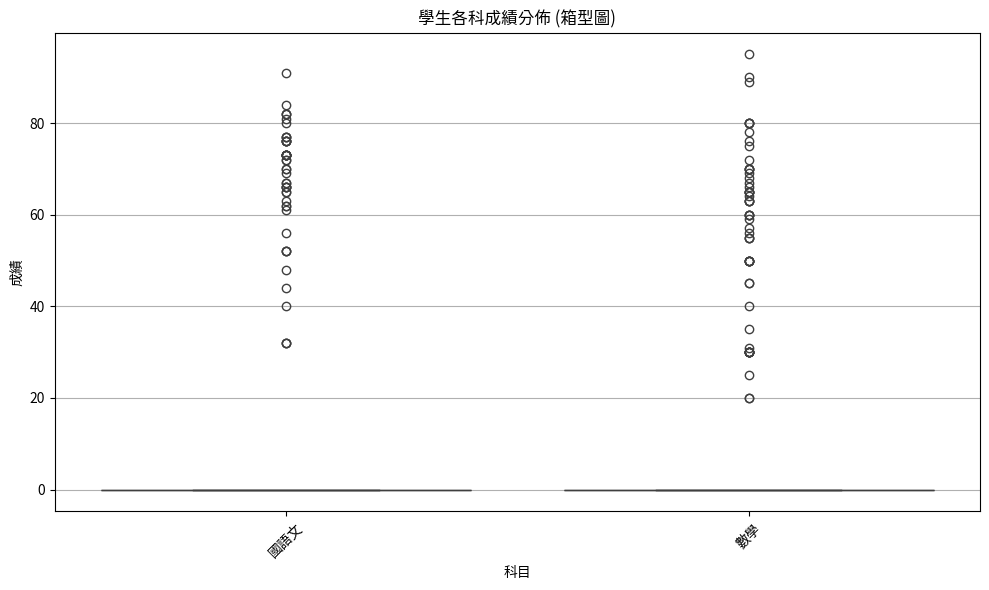

In [ ]:
df_2=df_0[df_0["科目"].isin(["數學", "國語文"])]
plt.figure(figsize=(10, 6))
sns.boxplot(x="科目", y="指派測驗平均成績", data=df_2)
plt.title("學生各科成績分佈 (箱型圖)")
plt.xlabel("科目")
plt.ylabel("成績")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
